# Singluar Value Decomposition

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

### Example

In [2]:
# matrix is
# A = [1  -1]
#     [0.5  1]
A = np.array([[1, -1],[0.5,1]])

In [3]:
# svd (set full_matrices = False for compact version)
# in this case compact version = regular version since A is square
U,Sigma,Vt = np.linalg.svd(A,full_matrices=False)

In [4]:
print("U: \n{}".format(U))

U: 
[[-0.89442719  0.4472136 ]
 [ 0.4472136   0.89442719]]


In [5]:
# print singular values (non-negative and in descending order)
print("Sigma: {}".format(Sigma))
print("diag Sigma: \n{}".format(np.diag(Sigma)))

Sigma: [1.5 1. ]
diag Sigma: 
[[1.5 0. ]
 [0.  1. ]]


In [7]:
print("Vt: \n{}".format(Vt))
V = Vt.T
print("v: \n{}".format(Vt.T))

Vt: 
[[-0.4472136   0.89442719]
 [ 0.89442719  0.4472136 ]]
v: 
[[-0.4472136   0.89442719]
 [ 0.89442719  0.4472136 ]]


In [6]:
# confirm svd check A - U*Sigma*Vt is near 0
diff = A - np.matmul(np.matmul(U,np.diag(Sigma)),Vt)
print("A - U*Sigma*Vt =  \n{}".format(diff))

A - U*Sigma*Vt =  
[[ 3.33066907e-16 -4.44089210e-16]
 [ 2.22044605e-16  0.00000000e+00]]


In [8]:
# Compute y = Ax
x = np.array([[0],[1]])
y = np.matmul(A,x)
print("x: \n{}".format(x))
print("y: \n{}".format(y))

x: 
[[0]
 [1]]
y: 
[[-1.]
 [ 1.]]


### Plot results

#### Plot in V space

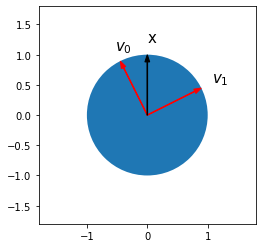

In [9]:
# Plot v0 and v1
fig, ax = plt.subplots()
scale = np.max(Sigma)
plt.xlim(-1.2*scale,1.2*scale)
plt.ylim(-1.2*scale,1.2*scale)
ax.set_aspect("equal")
plt.arrow(0,0,V[0,0],V[1,0],color="r",width=0.01,length_includes_head=True,head_width=0.08)
plt.arrow(0,0,V[0,1],V[1,1],color="r",width=0.01,length_includes_head=True,head_width=0.08)
plt.arrow(0,0,x[0,0],x[1,0],color="k",width=0.01,length_includes_head=True,head_width=0.08)
ax.text(1.2*V[0,0],1.2*V[1,0],"$v_0$",fontsize=15)
ax.text(1.2*V[0,1],1.2*V[1,1],"$v_1$",fontsize=15)
ax.text(1.2*x[0,0],1.2*x[1,0],"x",fontsize=15)
# create ellipse width = diameter in long direction, height = diameter in short direction for unit circle width=height=2
ellipse0 = matplotlib.patches.Ellipse(xy=[0,0],height=2,width=2)
ax.add_patch(ellipse0)

#### Plot in U space

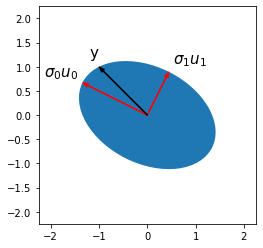

In [10]:
# plot s0*u0 and s1*u1
fig, ax = plt.subplots()
plt.xlim(-1.5*scale,1.5*scale)
plt.ylim(-1.5*scale,1.5*scale)
ax.set_aspect("equal")
plt.arrow(0,0,Sigma[0]*U[0,0],Sigma[0]*U[1,0],color="r",width=0.01,length_includes_head=True,head_width=0.08)
plt.arrow(0,0,Sigma[1]*U[0,1],Sigma[1]*U[1,1],color="r",width=0.01,length_includes_head=True,head_width=0.08)
plt.arrow(0,0,y[0,0],y[1,0],color="k",width=0.01,length_includes_head=True,head_width=0.08)
ax.text(1.6*Sigma[0]*U[0,0],1.2*Sigma[0]*U[1,0],"$\sigma_0u_0$",fontsize=15)
ax.text(1.2*Sigma[1]*U[0,1],1.2*Sigma[1]*U[1,1],"$\sigma_1u_1$",fontsize=15)
ax.text(1.2*y[0,0],1.2*y[1,0],"y",fontsize=15)
# create ellipse: width = diameter in long direction, height = diameter in short direction
# angle is angle of long direction wrt horizontal (u0 points in long direction)
angle = np.arctan(U[1,0]/(U[0,0]+1e-10))
ellipse1 = matplotlib.patches.Ellipse(xy=[0,0],width=2*Sigma[0],height=2*Sigma[1],angle=angle*180/np.pi)
ax.add_patch(ellipse1)